# Homework 1: Bayesian Bandit

The Bayesian Bandit approach employs Thompson Sampling to iteratively sample success probabilities for three options (A, B, C) with unknown probabilities. It dynamically adapts through trial simulations, updating posterior parameters (alpha and beta) based on observed outcomes. The final step visualizes the posterior distributions, offering a concise summary of updated beliefs about each option's success probability. This approach effectively balances exploration and exploitation, making informed decisions in uncertain environments.

In [7]:
#relevant imports
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt

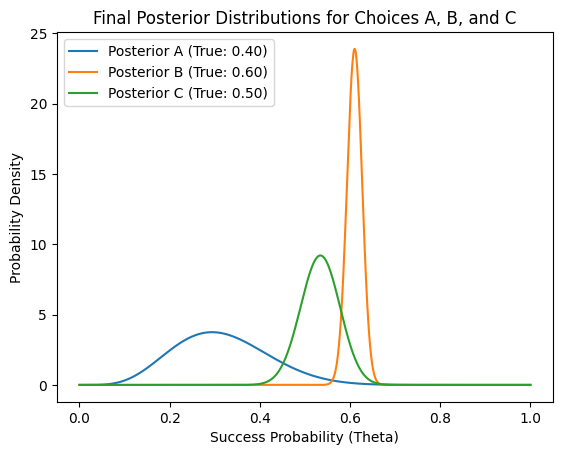

In [9]:
# True probabilities for each option
true_probabilities = {'A': 0.4, 'B': 0.6, 'C': 0.5}

# Prior parameters for each option
alpha = {'A': 1, 'B': 1, 'C': 1}
beta_val = {'A': 1, 'B': 1, 'C': 1}

# Number of simulations
num_simulations = 1000

# Number of trials for each option
num_trials = 10

# Simulate the Bayesian Bandit process
for _ in range(num_simulations):
    sampled_values = {option: beta(alpha[option], beta_val[option]).rvs() for option in true_probabilities.keys()}

    # Choose the option with the highest sampled value (Thompson Sampling)
    chosen_option = max(sampled_values, key=sampled_values.get)

    # Simulate a trial for the chosen option
    success = np.random.binomial(n=1, p=true_probabilities[chosen_option])

    # Update the posterior parameters based on the observed data
    alpha[chosen_option] += success
    beta_val[chosen_option] += 1 - success

# Visualize the final posterior distributions
theta_values = np.linspace(0, 1, 1000)

for option in true_probabilities.keys():
    posterior = beta(alpha[option], beta_val[option]).pdf(theta_values)
    plt.plot(theta_values, posterior, label=f"Posterior {option} (True: {true_probabilities[option]:.2f})")

plt.title('Final Posterior Distributions for Choices A, B, and C')
plt.xlabel('Success Probability (Theta)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### What's the data?

The data is simulated based on a binomial distribution. For each of the three choices (A, B, C), a trial is simulated. The success or failure of the trial is determined by a binomial distribution with a probability of success equal to the true probability of success for the chosen option.

## What's the update for the posterior in question?

The update for the posterior is performed based on the observed data. If the trial is a success, the alpha parameter of the corresponding option is increased by 1, and if it's a failure, the beta parameter is increased by 1. This update is specific to the option chosen using Thompson Sampling.

## Which one of the three choices will you try out? How will you choose?

The choice of which option to try out is determined using Thompson Sampling. For each simulation, sampled values from the beta distribution are obtained for all three options. The option with the highest sampled value is chosen for the trial. This process balances exploration (trying different options) and exploitation (choosing options with higher believed success probabilities).